In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Housing.csv')

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
def fun(value):
  if value=='yes':
    return 1
  else:
    return 0
def fun_furnish(value):
  if value=='furnished':
    return 2
  elif value=='semi-furnished':
    return 1
  else:
    return 0
df['mainroad']=df['mainroad'].apply(fun)
df['guestroom']=df['guestroom'].apply(fun)
df['basement']=df['basement'].apply(fun)
df['hotwaterheating']=df['hotwaterheating'].apply(fun)
df['airconditioning']=df['airconditioning'].apply(fun)
df['prefarea']=df['prefarea'].apply(fun)
df['furnishingstatus']=df['furnishingstatus'].apply(fun_furnish)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [7]:
x=df
y=df['price']
x.drop('price',axis=1,inplace=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.8)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)

In [9]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)

0.6494754192267803


In [10]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
print(lin2.score(poly.fit_transform(X_test), y_test))

0.6497236682269396


In [11]:
x_poly_test=poly.fit_transform(X_test)

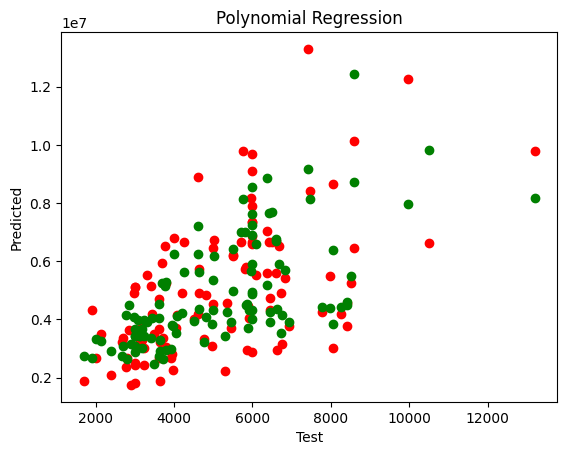

In [70]:
# plt.scatter(X_test['area'], y_test, color='blue')
# plt.scatter(y_test,lin2.predict(x_poly_test) , color='red')
plt.scatter(X_test['area'], y_test, label='Test Data', color='red')
plt.scatter(X_test['area'],lin2.predict(x_poly_test), label='Polynomial Regression', color='green')

plt.title('Polynomial Regression')
plt.xlabel('Test')
plt.ylabel('Predicted')

plt.show()


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [18]:
X_train.shape[1]

12

In [79]:
model=Sequential()
model.add(Dense(1000,input_shape=(X_scaled.shape[1],)))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 1000)           │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 670,251 (2.56 MB)

 Trainable params: 670,251 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer='adam',loss='msle',metrics=['msle'])
history = model.fit(X_scaled,y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 214.3391 - msle: 214.3391 - val_loss: 157.0048 - val_msle: 157.0048
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 144.9493 - msle: 144.9493 - val_loss: 111.8572 - val_msle: 111.8572
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 106.3242 - msle: 106.3242 - val_loss: 86.6331 - val_msle: 86.6331
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 84.2364 - msle: 84.2364 - val_loss: 70.9458 - val_msle: 70.9458
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69.3258 - msle: 69.3258 - val_loss: 60.1445 - val_msle: 60.1445
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 59.3340 - msle: 59.3340 - val_loss: 52.1310 - val_msle: 52.1310
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 51.9275 - msle: 51.9275 - val_loss: 45.8709 - val_msle: 45.8709
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 45.8668 - msle: 45.8668 - val_loss: 40.7978 - val_msle

In [81]:
y_pred = model.predict(X_scaled_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [82]:
y_pred[:,0]

array([4538817.5, 7003179. , 3171837.2, 4289973. , 3379743.8, 3554155.5,
       5315510.5, 5966621. , 2708198.5, 2943112.5, 9991602. , 2965006.2,
       2874117.8, 3302603.5, 3536258.2, 4293766.5, 2997430.2, 4423752.5,
       4110378.8, 3540546.5, 5480438. , 5686361.5, 2913287. , 4464815.5,
       4837898.5, 6962433.5, 3213281. , 4655364.5, 8480651. , 3370187.8,
       5793701.5, 3039231.8, 6285553. , 4088534.5, 3485899.5, 5072482. ,
       4358882.5, 4050512.8, 2907833. , 4125218. , 4304757.5, 3231681.8,
       6977483. , 3784783.5, 3702914.5, 3928744.5, 6229565. , 3781273. ,
       3794352. , 3060055.2, 7092720.5, 2771027.5, 4269009.5, 4110643.8,
       3548414. , 2981222. , 7489048.5, 2911405.2, 4159006. , 2940689.2,
       3977350.5, 3014857. , 4514384. , 3940436. , 4388870. , 4058807. ,
       6619479. , 3315656.2, 5506720.5, 5919037.5, 4175824.5, 5029871. ,
       4433510. , 7914738.5, 3080523. , 4808365.5, 3499238. , 4442237.5,
       4544468.5, 4048890.5, 7853221. , 3617712.8, 

In [83]:
import pandas as pd
import numpy as np

def calculate_mse(df1, df2):

    if df1.shape != df2.shape:
        raise ValueError("DataFrames must have the same shape.")

    squared_errors = (df1 - df2) ** 2
    mse = squared_errors.mean().mean() # Mean across all cells
    return mse
mse_value = calculate_mse(y_test,y_pred[:,0])
print(f"Mean Squared Error: {mse_value}")



Mean Squared Error: 1918667220342.8086


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


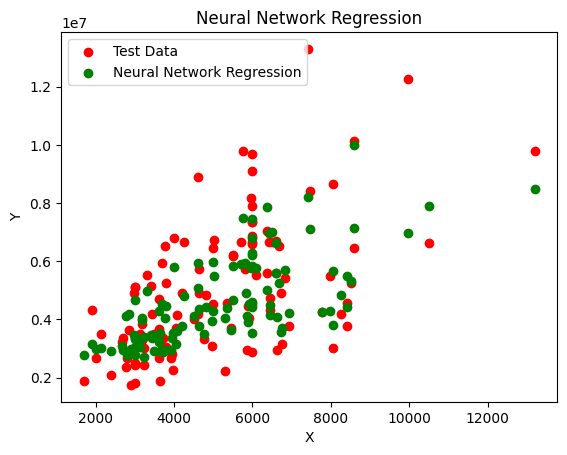

In [84]:
# plt.scatter(X_train['area'], y_train, label='Training Data', color='blue')
plt.scatter(X_test['area'], y_test, label='Test Data', color='red')
plt.scatter(X_test['area'], model.predict(X_scaled_test), label='Neural Network Regression', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()
